In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Урок 7
### Задание 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга  
(ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату  
(то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная).  
Произвести расчет как с использованием intercept, так и без.

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

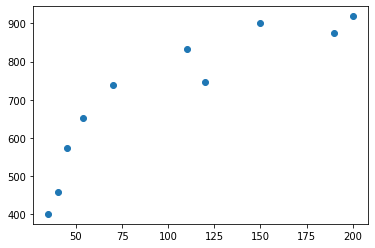

In [3]:
plt.scatter(zp, ks)
plt.show()

зависимость больше похожа на логарифмическую, однако задача про линейную регрессию  
первый вариант - без intercept  
y = bx

In [4]:
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp)**2)
b

2.620538882402765

In [5]:
ks_hat = b * zp
ks_hat

array([ 91.71886088, 117.92424971, 497.90238766, 524.10777648,
       104.8215553 , 183.43772177, 141.50909965, 393.08083236,
       314.46466589, 288.25927706])

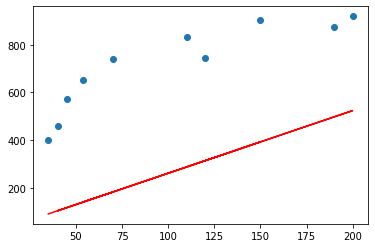

In [6]:
plt.scatter(zp, ks)
plt.plot(zp, ks_hat, color='r')
plt.show()

In [7]:
mse = np.mean((ks - ks_hat)**2)
mse

203763.93896082853

без intercept модель показала определенную зависимость, однако для использования не пригодна  

второй вариант - используя intercept  
y = a + bx

In [8]:
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp)**2)
b

2.620538882402765

In [9]:
a = np.mean(ks) - b * np.mean(zp)
a

444.1773573243596

In [10]:
ks_hat = a + b * zp
ks_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

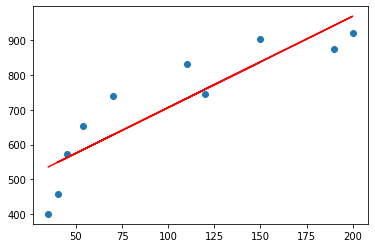

In [11]:
plt.scatter(zp, ks)
plt.plot(zp, ks_hat, color='r')
plt.show()

In [12]:
mse = np.mean((ks_hat - ks)**2)
mse

6470.414201176658

In [13]:
((ks_hat - ks)**2).sum() / len(ks)

6470.414201176658

### Матричный метод

In [14]:
zp1 = np.reshape(zp, (zp.shape[0], 1))
ks1 = np.reshape(ks, (ks.shape[0], 1))
zp1 = np.hstack([np.ones((zp1.shape[0], 1)), zp1])
B = np.dot(np.linalg.inv(np.dot(zp1.T, zp1)), zp1.T@ks1)
print(B)

[[444.17735732]
 [  2.62053888]]


### Задание 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).  
mse = ((ks - ks_hat)**2).sum() / n,  
где ks_hat = B1 * zp и n = len(ks)  

тогда  
mse = sum( (ks - B1 * zp)**2 ) / len(ks)  
mse_der = sum( 2 * (ks - B1 * zp) * zp ) / len(ks)  
при каждой итерации коэффициент B1 изменяется на отрицательный градиент, уможенный на шаг итерации alhpa  
B1_new = B1 - alpha * 2 / len(ks) * sum((ks - B1 * zp) * -zp)


In [15]:
def mse_(y, x, B1):
    return np.mean((y - B1 * x)**2)


def get_B1_nonintersept(y, x, alpha, B1, vol_iter, print_elm=1):
    for i in range(vol_iter):
        B1 -= alpha * 2 / len(y) * np.sum((y - B1 * x) * -x)
        print(f'Iteration {i}, B1 = {B1:.8f}, mse = {mse_(y, x, B1):.8f}') if i % print_elm == 0 else B1
    return B1

In [16]:
alpha = 1e-6
B1 = 0.1
vol_iter = 3000
show_elm = 500

x = np.array([27, 37, 42, 48, 54, 56, 77, 80])
y = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3.0, 3.3])
B1_new = get_B1_nonintersept(y, x, alpha, B1, vol_iter, show_elm)
print(f'Iteration {vol_iter}, B1 = {B1_new:.8f}, mse = {mse_(y, x, B1_new):.8f}') 
    

Iteration 0, B1 = 0.09964362, mse = 10.24963655
Iteration 500, B1 = 0.04458608, mse = 0.05018107
Iteration 1000, B1 = 0.04205017, mse = 0.02854347
Iteration 1500, B1 = 0.04193337, mse = 0.02849757
Iteration 2000, B1 = 0.04192799, mse = 0.02849747
Iteration 2500, B1 = 0.04192774, mse = 0.02849747
Iteration 3000, B1 = 0.04192773, mse = 0.02849747


In [17]:
print(f'zp = {zp}\nks = {ks}')

zp = [ 35  45 190 200  40  70  54 150 120 110]
ks = [401 574 874 919 459 739 653 902 746 832]


In [18]:
alpha = 1e-7
B1 = 10
vol_iter = 10000
show_elm = 1000

B1_new = get_B1_nonintersept(ks, zp, alpha, B1, vol_iter, show_elm)
print(f'Iteration {vol_iter}, B1 = {B1_new:.10f}, mse = {mse_(ks, zp, B1_new):.10f}') 

Iteration 0, B1 = 9.98867514, mse = 287972.14234256
Iteration 1000, B1 = 6.14947183, mse = 57445.66100066
Iteration 2000, B1 = 5.90626864, mse = 56520.58559026
Iteration 3000, B1 = 5.89086237, mse = 56516.87337243
Iteration 4000, B1 = 5.88988642, mse = 56516.85847574
Iteration 5000, B1 = 5.88982460, mse = 56516.85841596
Iteration 6000, B1 = 5.88982069, mse = 56516.85841572
Iteration 7000, B1 = 5.88982044, mse = 56516.85841572
Iteration 8000, B1 = 5.88982042, mse = 56516.85841572
Iteration 9000, B1 = 5.88982042, mse = 56516.85841572
Iteration 10000, B1 = 5.8898204201, mse = 56516.8584157194


zp = [ 35  45 190 200  40  70  54 150 120 110]
ks = [401 574 874 919 459 739 653 902 746 832]
ks_hat = [ 206.14  265.04 1119.07 1177.96  235.59  412.29  318.05  883.47  706.78
  647.88]
B1 = 5.8898204201369655


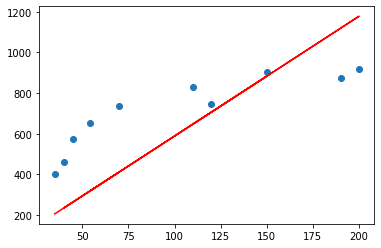

In [19]:
ks_hat = [B1_new * i for i in zp]
print(f'zp = {zp}\nks = {ks}\nks_hat = {np.round(ks_hat, 2)}\nB1 = {B1_new}')
plt.scatter(zp, ks)
plt.plot(zp, ks_hat, color='r')
plt.show()

### Задание 4
Градинтный спуск с intersept  
y = B1 + B2 * x  
mse = mean((y - B1 - B2 * x)**2  
mse_der_B1 = 2 / n * (y - B1 - B2 * x) * (-1)  
mse_der_B2 = 2 / n * (y - B1 - B2 * x) * (-x)

In [20]:
def mse_intersept(y, x, B):
    return np.mean((y - B[0] - B[1] * x)**2)


def get_B_intersept(y, x, alpha, B, vol_iter, print_elm=1):
    for i in range(vol_iter):
        B1 = B[0] - alpha * 2 / len(y) * np.sum((y - B[0] - B[1] * x) * -1)
        B2 = B[1] - alpha * 2 / len(y) * np.sum((y - B[0] - B[1] * x) * -x)
        B[0], B[1] = B1, B2
        if i % print_elm == 0:
            print(f'Iteration {i}, B1 = {B[0]:.8f}, B2 = {B[1]:.8f}, mse = {mse_intersept(y, x, B):.8f}')
    return B

In [21]:
alpha = 1e-5
B = [444, 2.62]
vol_iter = 500000
show_elm = 50000

B_new = get_B_intersept(ks, zp, alpha, B, vol_iter, show_elm)
print(f'Iteration {vol_iter}, B1 = {B_new[0]:.10f}, B2 = {B_new[1]:.10f}, mse = {mse_intersept(ks, zp, B_new):.10f}') 

Iteration 0, B1 = 444.00000464, B2 = 2.62050816, mse = 6470.44677315
Iteration 50000, B1 = 444.03974602, B2 = 2.62155176, mse = 6470.41900480
Iteration 100000, B1 = 444.07057619, B2 = 2.62132484, mse = 6470.41709352
Iteration 150000, B1 = 444.09449923, B2 = 2.62114875, mse = 6470.41594270
Iteration 200000, B1 = 444.11306260, B2 = 2.62101212, mse = 6470.41524978
Iteration 250000, B1 = 444.12746706, B2 = 2.62090610, mse = 6470.41483256
Iteration 300000, B1 = 444.13864438, B2 = 2.62082383, mse = 6470.41458134
Iteration 350000, B1 = 444.14731755, B2 = 2.62075999, mse = 6470.41443008
Iteration 400000, B1 = 444.15404761, B2 = 2.62071045, mse = 6470.41433900
Iteration 450000, B1 = 444.15926987, B2 = 2.62067201, mse = 6470.41428416
Iteration 500000, B1 = 444.1633220772, B2 = 2.6206421880, mse = 6470.4142511456


zp = [ 35  45 190 200  40  70  54 150 120 110]
ks = [401 574 874 919 459 739 653 902 746 832]
ks_hat = [535.89 562.09 942.09 968.29 548.99 627.61 585.68 837.26 758.64 732.43]
B1 = [444.16332207717477, 2.6206421880273845]


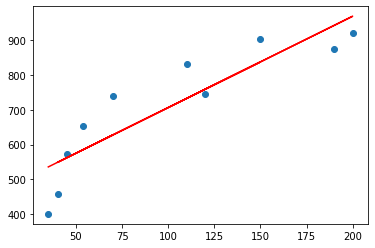

In [22]:
ks_hat = [B_new[0] + B_new[1] * i for i in zp]
print(f'zp = {zp}\nks = {ks}\nks_hat = {np.round(ks_hat, 2)}\nB1 = {B_new}')
plt.scatter(zp, ks)
plt.plot(zp, ks_hat, color='r')
plt.show()